## Credit Risk Analysis with an Unbalanced Target Variable

## Background
Credit risk is an inherently unbalanced classification problem, as good loans (low risk) easily outnumber risky loans (high risk). This requires the use of different techniques to train and evaluate models with unbalanced classes using modules from the imbalanced-learn and scikit-learn libraries


## Deliverables

* Deliverable 1: Use Resampling Models to Predict Credit Risk
* Deliverable 2: Use the SMOTEENN Algorithm to Predict Credit Risk
* Deliverable 3: Use Ensemble Classifiers to Predict Credit Risk
* Deliverable 4: A Written Report on the Credit Risk Analysis (README.md)


## Customer Provided 
(see resouces folder)

* LoanStats_2019Q1.csv dataset
* credit_risk_resampling_starter_code.ipynb 
* credit_risk_ensemble_starter_code.ipynb.

### Import Dependencies from Python, scikit-learn, imbalanced-learn

In [1]:
# import Python dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
# import sklearn dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# import imblearn dependencies
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

In [4]:
# other dependencies
import warnings
warnings.filterwarnings('ignore')

# Read the CSV and Perform Basic Data Cleaning
https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-


In [5]:
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

target = ["loan_status"]

In [6]:
# Load the data
file_path = Path('./Resources/LoanStats_2019Q1.csv.zip')
df = pd.read_csv(file_path, skiprows=1)[:-2]
df = df.loc[:, columns].copy()

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

# Remove the `Issued` loan status
issued_mask = df['loan_status'] != 'Issued'
df = df.loc[issued_mask]

# convert interest rate to numerical
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float') / 100


# Convert the target column values to low_risk and high_risk based on their values
x = {'Current': 'low_risk'}   
df = df.replace(x)

x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_risk')    
df = df.replace(x)

df.reset_index(inplace=True, drop=True)

df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [7]:
columns = df.select_dtypes(include=['object']).columns
columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'application_type',
       'hardship_flag', 'debt_settlement_flag'],
      dtype='object')

# Split the Data into Training and Testing

In [8]:
# Create our features
# create the feature matrix (X)
X = df.copy()
X = X.drop(columns="loan_status")
X.shape

(68817, 85)

In [9]:
# convert the string values into numerical ones using the get_dummies() method.
X_encoded = pd.get_dummies(X)
X_encoded.shape

(68817, 95)

In [10]:
# Create our target
y = df.loc[:, "loan_status"].copy()

In [11]:
y

0        low_risk
1        low_risk
2        low_risk
3        low_risk
4        low_risk
           ...   
68812    low_risk
68813    low_risk
68814    low_risk
68815    low_risk
68816    low_risk
Name: loan_status, Length: 68817, dtype: object

In [12]:
# Check the balance of the target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [13]:
X_encoded.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.177238,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.381873,0.0,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637,0.0,0.0
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [14]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1)

# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [15]:
# Resample the training data with the RandomOversampler

# create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=1)

# Create resampled data using the fit_resample() method
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# count the occurances of the target variable
Counter(y_resampled)

Counter({'low_risk': 51366, 'high_risk': 51366})

In [16]:
# Train the Logistic Regression model using the resampled data

# create an instance of a Logistic Regression model
model = LogisticRegression(random_state=1)
model

# fit / train the model using the resampled data
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [17]:
# create predictions using predict() method
predictions = model.predict(X_test)

In [18]:
# Calculated the balanced accuracy score
print(f" balanced_accuracy_score: {balanced_accuracy_score(y_test, predictions):.3f}")

 balanced_accuracy_score: 0.647


In [19]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
cm

array([[   70,    31],
       [ 6813, 10291]], dtype=int64)

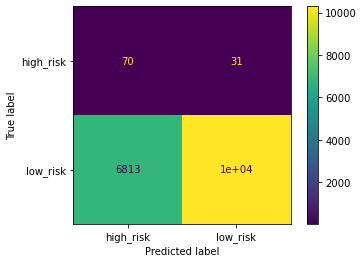

In [20]:
# diplay the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
disp.plot()
# plt.savefig("./Images/RandomOverSampler_confusion_matrix.png")
plt.show()

In [21]:
# Print the imbalanced classification report
report = classification_report_imbalanced(y_test, predictions)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.69      0.60      0.02      0.65      0.42       101
   low_risk       1.00      0.60      0.69      0.75      0.65      0.41     17104

avg / total       0.99      0.60      0.69      0.75      0.65      0.41     17205



### Assessment: The Logistic Regression Classifier using Random Oversampling is not usable for high_risk loans as indicated by the low precision score and low f1 score

### SMOTE Oversampling

In [22]:
# Resample the training data with Synthetic Minority Oversampling Technique (SMOTE)
X_resampled, y_resampled = SMOTE(random_state=1,
    sampling_strategy='auto').fit_resample(X_train, y_train)

# check the count
Counter(y_resampled)


Counter({'low_risk': 51366, 'high_risk': 51366})

In [23]:
# Train the Logistic Regression model using the resampled data

# create an instance of a Logistic Regression model
model = LogisticRegression(random_state=1)

# fit /train the model
model.fit(X_resampled, y_resampled)

# create predictions
predictions = model.predict(X_test)

In [24]:
# Calculated the balanced accuracy score
print(f" the balanced_accuracy_score is: {balanced_accuracy_score(y_test, predictions):.3f}")

 the balanced_accuracy_score is: 0.662


In [25]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[   64,    37],
       [ 5291, 11813]], dtype=int64)

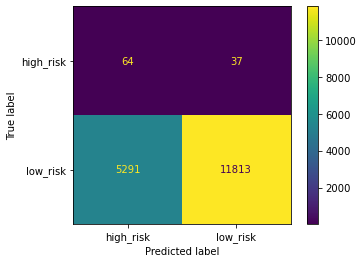

In [26]:
# display the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
disp.plot()
# plt.savefig("./Images/SMOTE_conf_matrix.png")
plt.show()

In [27]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.63      0.69      0.02      0.66      0.44       101
   low_risk       1.00      0.69      0.63      0.82      0.66      0.44     17104

avg / total       0.99      0.69      0.63      0.81      0.66      0.44     17205



### Assessment: The Logistic Regression Classifier with SMOTE Oversampling is not usable for high_risk loans as indicated by the low precision score and low f1 score

# Undersampling

In this section, you will test an undersampling algorithms to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [1]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
# create an instance of ClusterCentroids()
cc = ClusterCentroids(random_state=1)

# create resampled variables from X_train and y_train using the fit_resample() method
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

# check the count
Counter(y_resampled)

NameError: name 'ClusterCentroids' is not defined

In [ ]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(random_state=1)

# fit / train the model using the resampled data
model.fit(X_resampled, y_resampled)

# make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" The balanced accuracy score for the LogisticRegression Model using the ClusterCentroids resampler is: {balanced_acc_score:.3f}")

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# diplay the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
disp.plot()
# plt.savefig("./Images/ClusterCentroids_confusion_matrix.png")
plt.show()

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

### Assessment: The Logistic Regression Classifier with ClusterCentroids resampling is not usable for high_risk loans as indicated by the low precision score and low f1 score

# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [ ]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
# create an instance of SMOTEENN
smote_enn = SMOTEENN(random_state=0)

# create resampled variables for X_train and y_train using the fit_resample() method
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# check the count
Counter(y_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data

# create an instance of a LogisticRegression Model
model = LogisticRegression(random_state=1)

# fit / train the model using the resampled data
model.fit(X_resampled, y_resampled)

# make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" The balanced accuracy score for the LogisticRegression Model using SMOTEENN is: {balanced_acc_score:.3f}")

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# display the confusion matrix display 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
disp.plot()
# plt.savefig("./Images/SMOTEENN_confusion_matrix.png")
plt.show()

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

### Assessment: The Logistic Regression Classifier with  with SMOTEENN resampling is not usable for high_risk loans as indicated by the low precision score and low f1 score

## Analysis of Results: the techniques of Oversampling, Undersampling and a Combination failed to adequately predict high_risk loans in the unbalanced classification dataset
